In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from ultralytics import YOLO
import zipfile
import requests
import glob
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import  display
display.clear_output()
get_ipython().system(' yolo checks')

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.12
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                41.5/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm               

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xKSSv99TxSF8UxzKluVn")
project = rf.workspace("saialmeedan").project("sai-almeedan-xdetn")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


**NANO MODEL**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=1 imgsz=640

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/sai-almeedan-5/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

In [ ]:
!ls runs/detect/train/

args.yaml			 P_curve.png	   train_batch1.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2.jpg
confusion_matrix.png		 R_curve.png	   val_batch0_labels.jpg
F1_curve.png			 results.csv	   val_batch0_pred.jpg
labels_correlogram.jpg		 results.png	   weights
labels.jpg			 train_batch0.jpg


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9555555555555556
Test Accuracy:  1.0


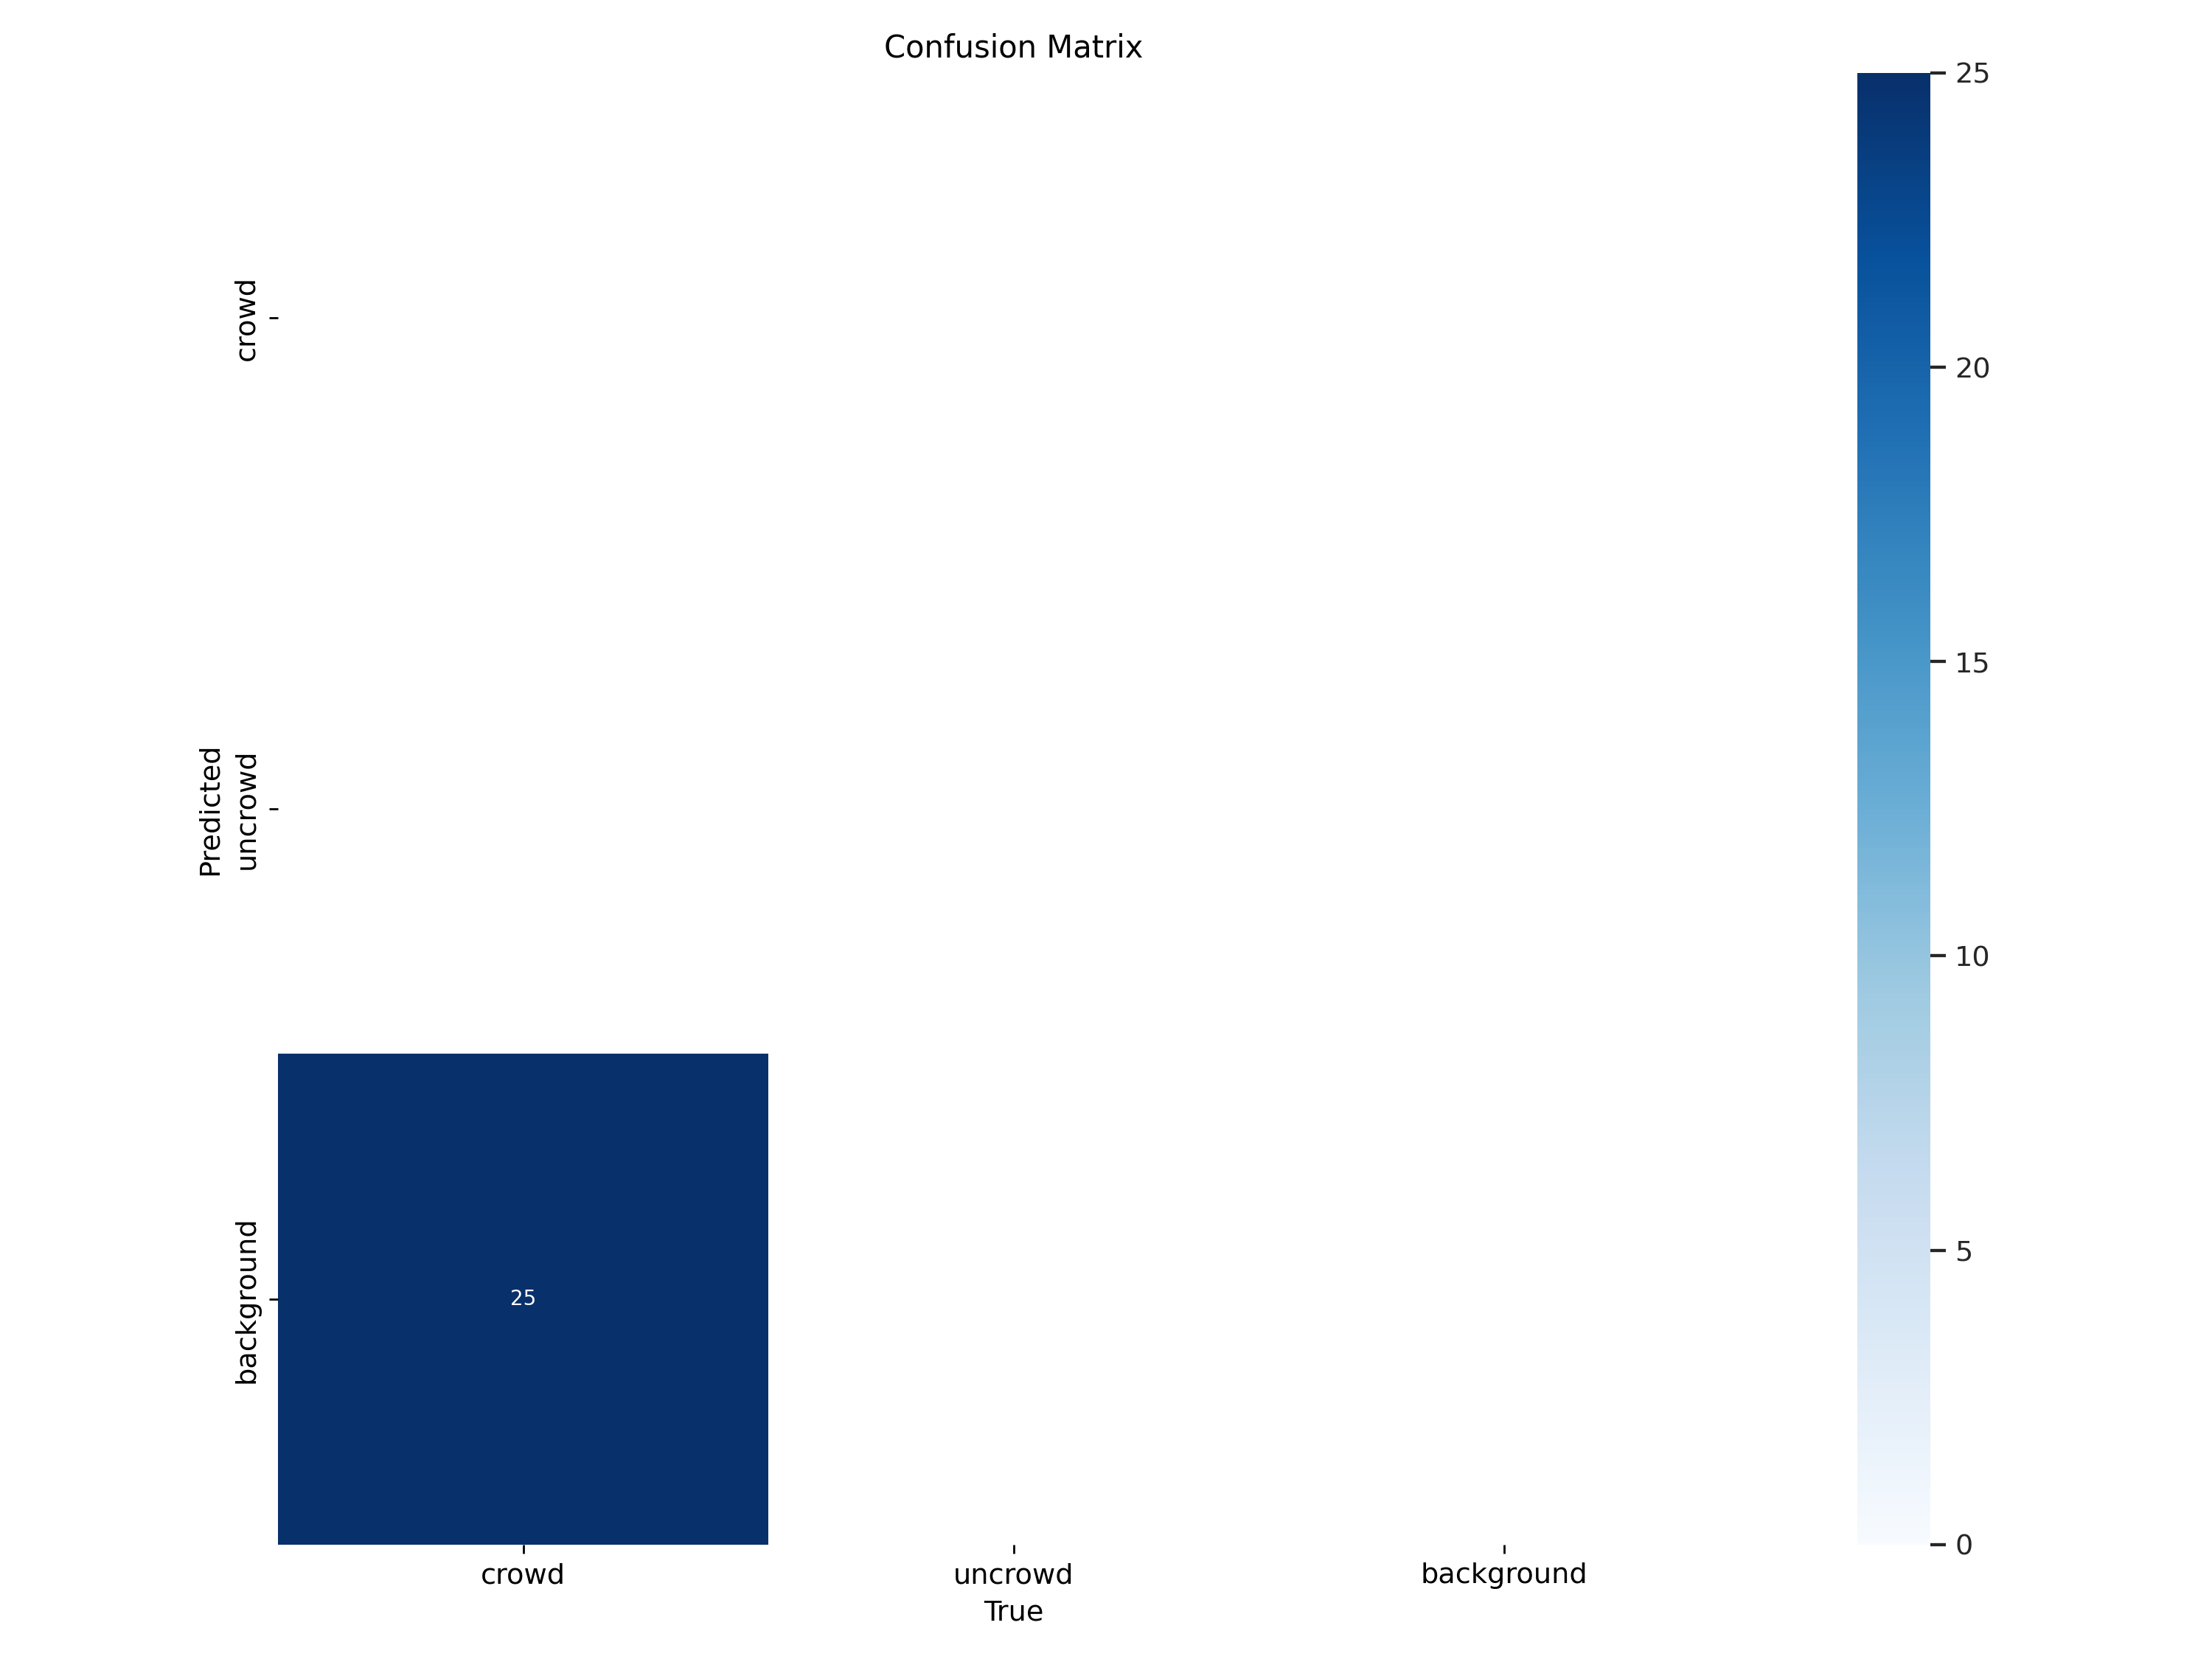

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

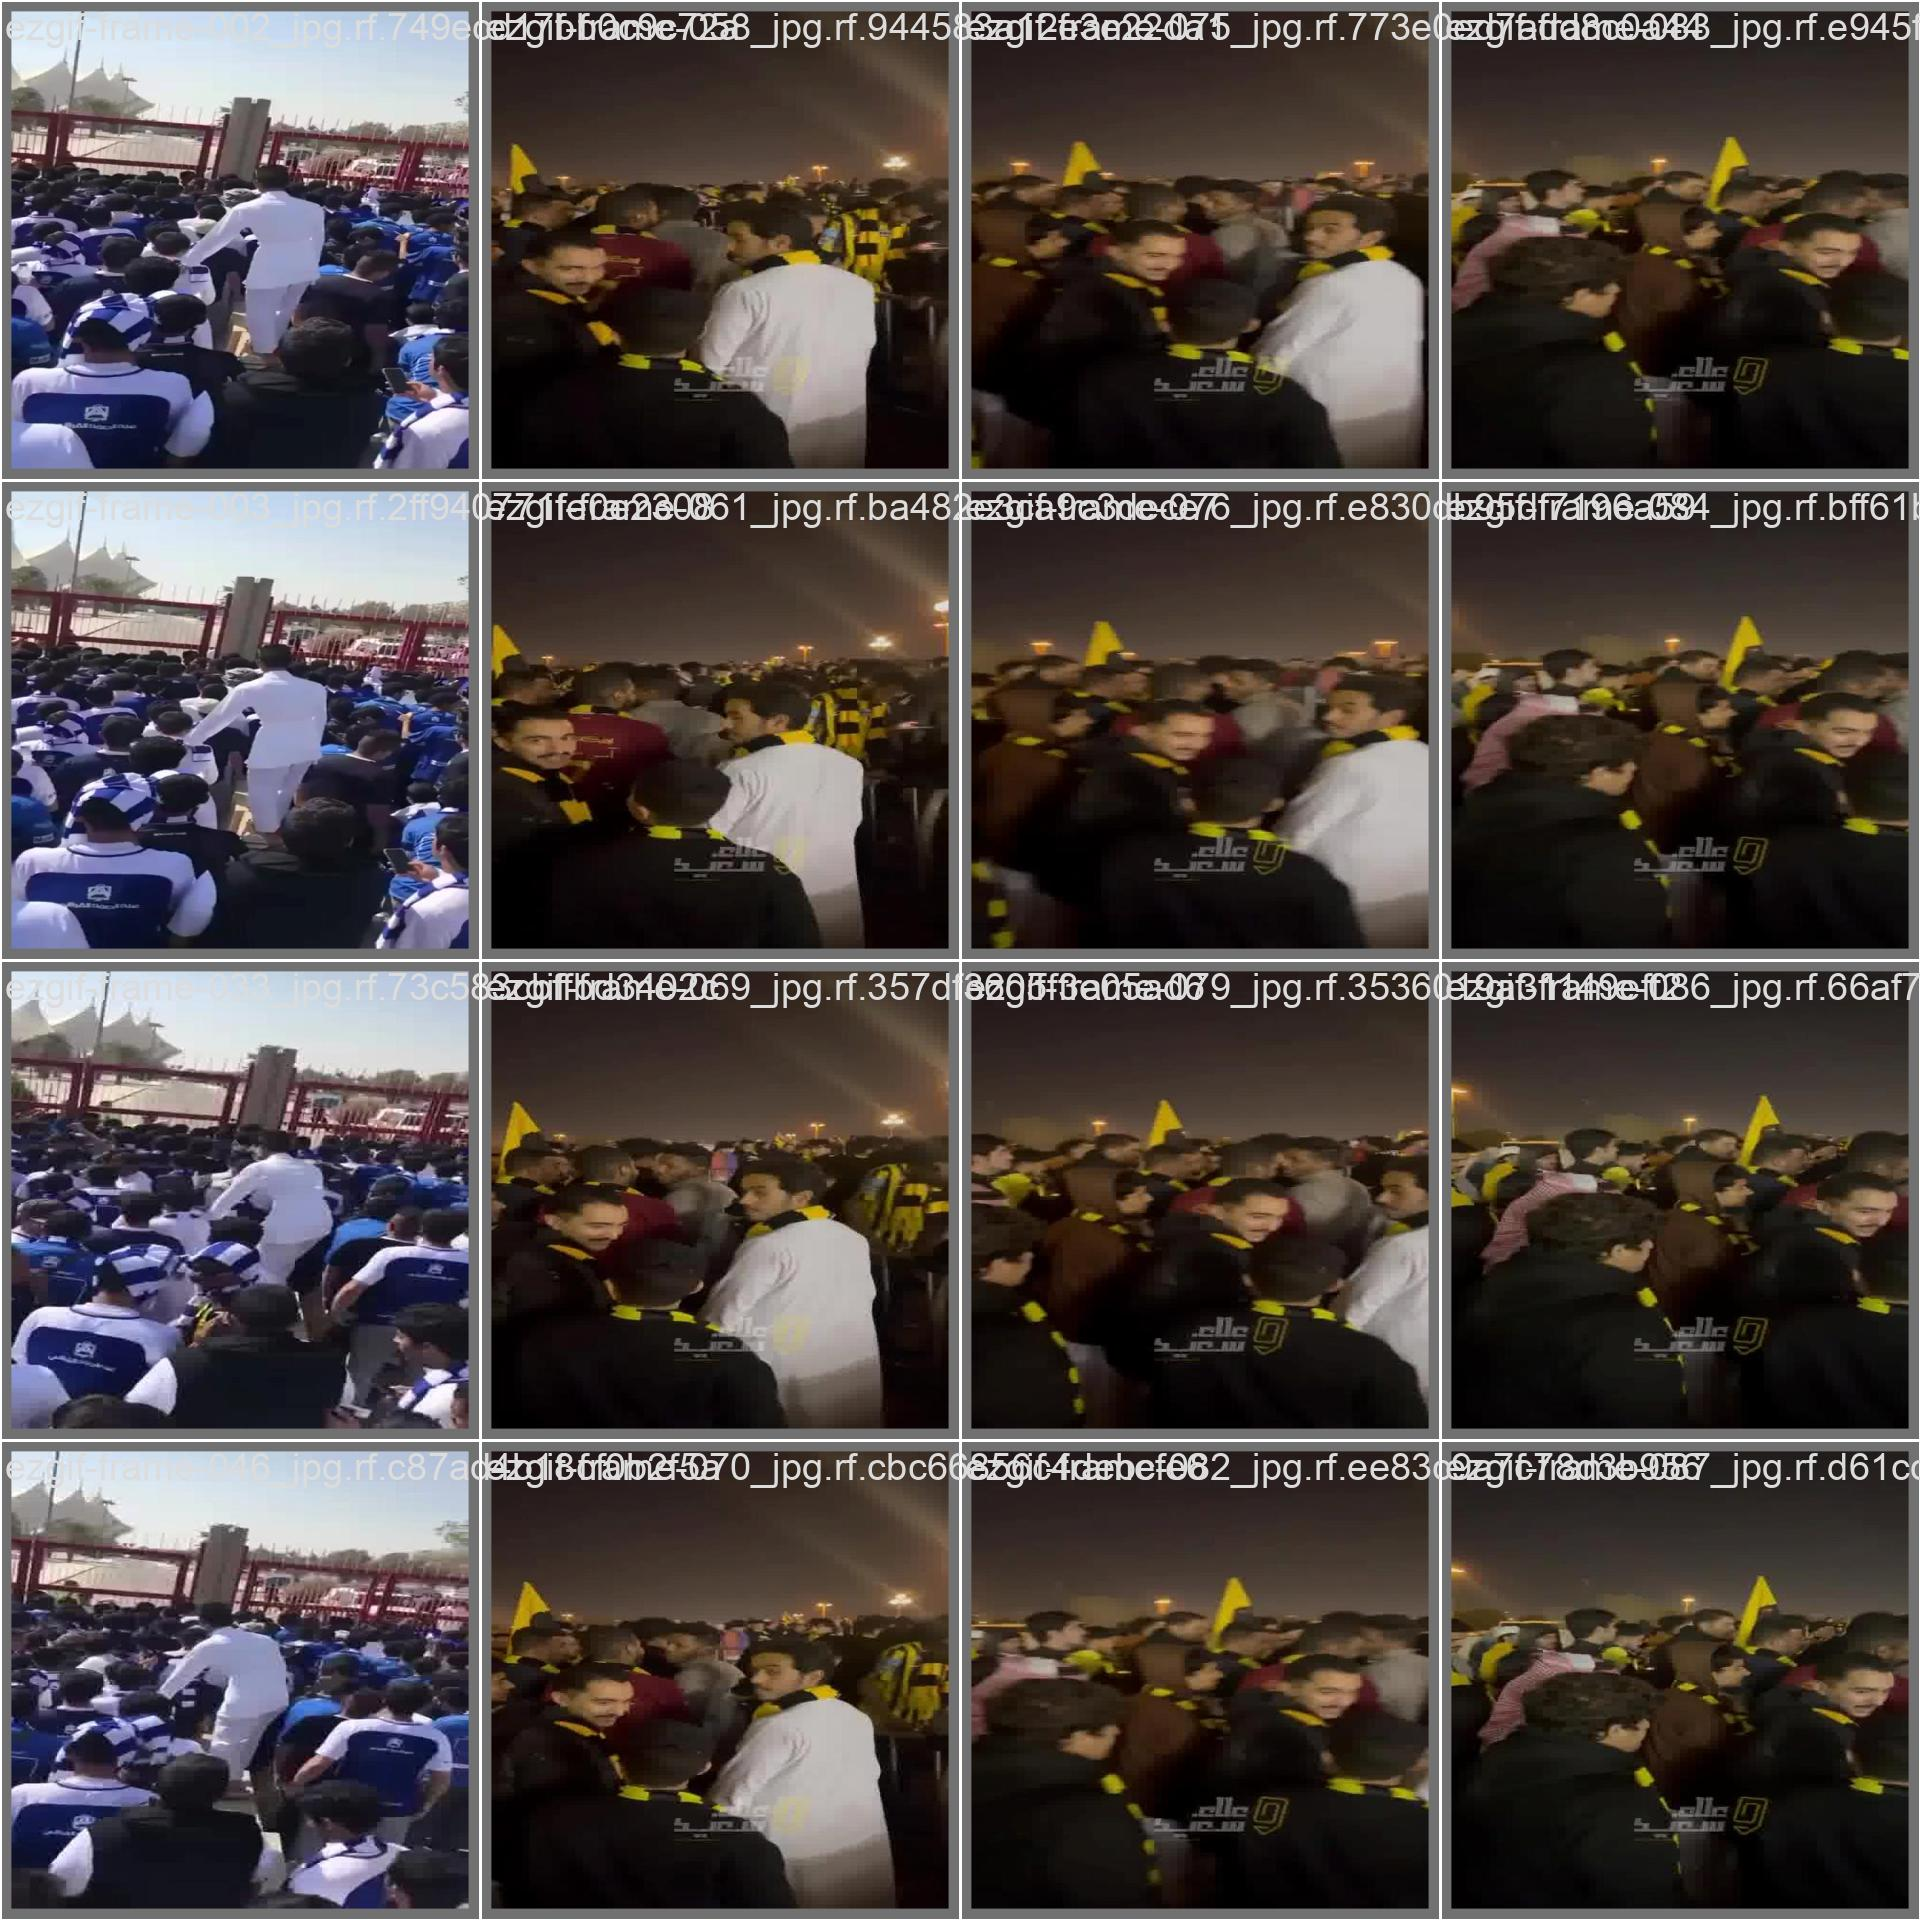

In [ ]:
Image(filename='/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

**YOLOv8 Medium model**

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=1 imgsz=640

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/sai-almeedan-5/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

In [ ]:
!ls runs/detect/train/

args.yaml			 P_curve.png	   train_batch1.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2.jpg
confusion_matrix.png		 R_curve.png	   val_batch0_labels.jpg
F1_curve.png			 results.csv	   val_batch0_pred.jpg
labels_correlogram.jpg		 results.png	   weights
labels.jpg			 train_batch0.jpg


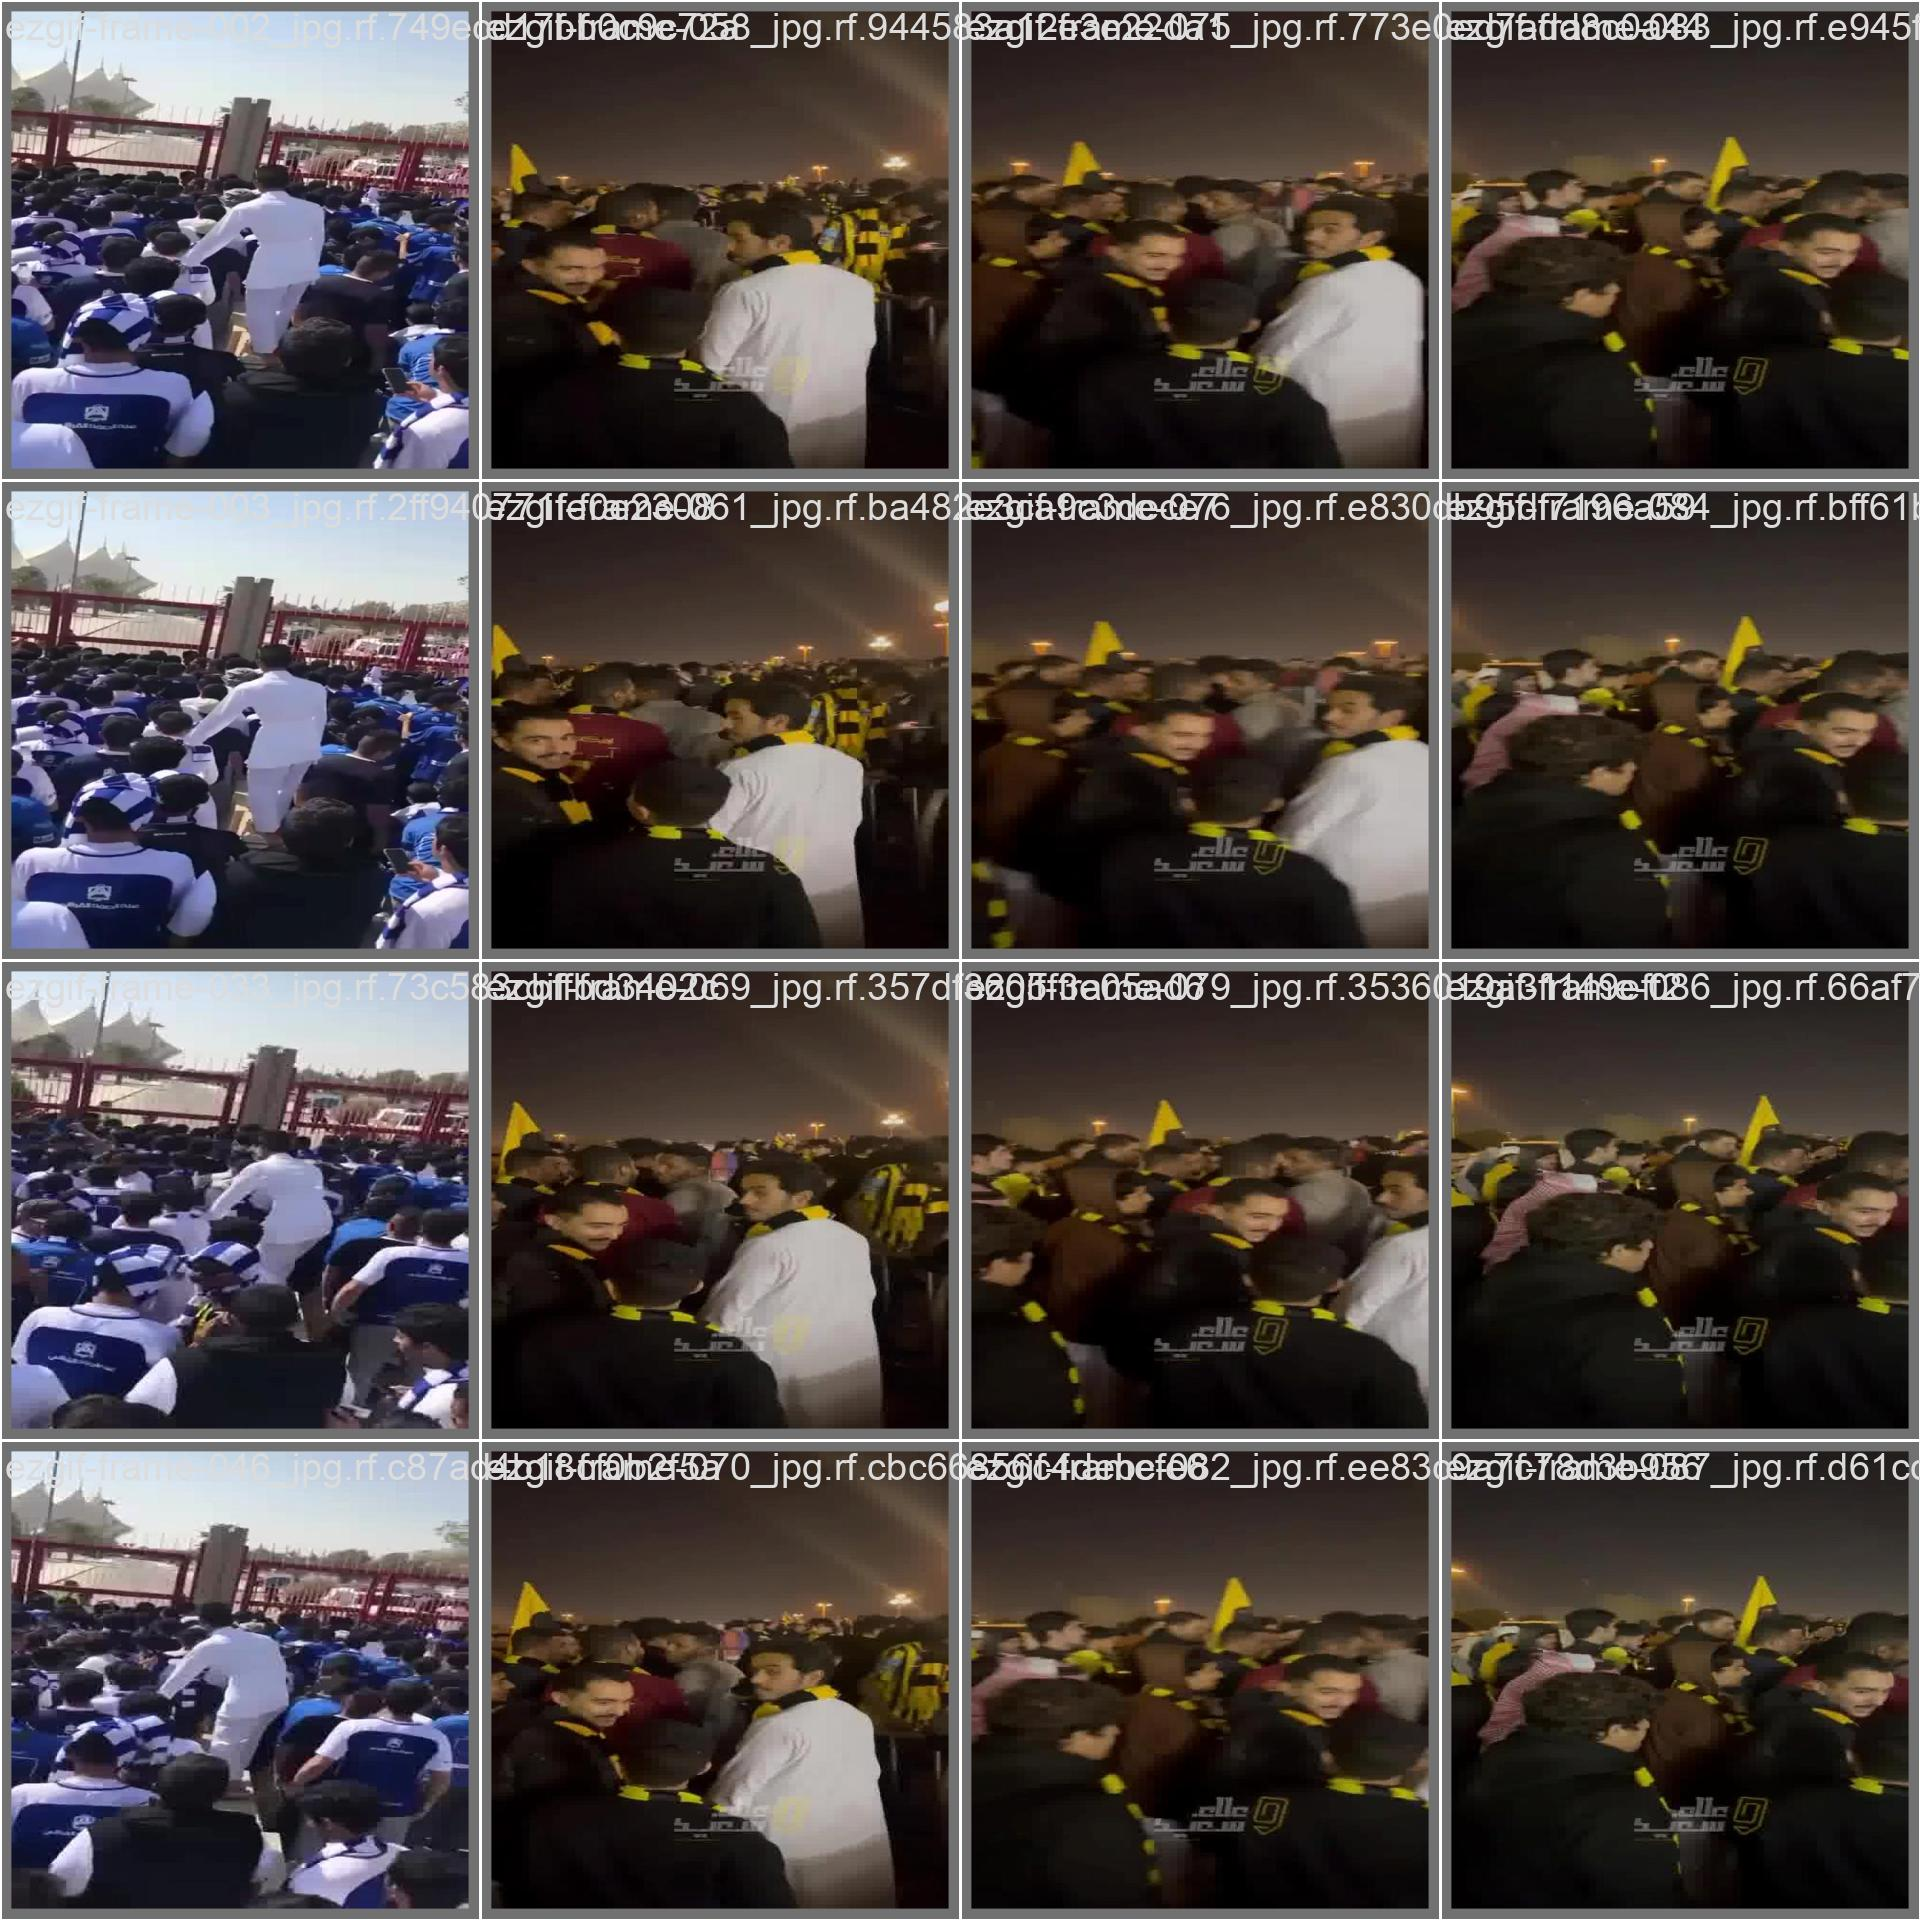

In [ ]:
Image(filename='/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9555555555555556
Test Accuracy:  1.0


# **LARGE MODEL **

In [ ]:
!yolo task=detect mode=train model=yolov8L.pt data={dataset.location}/data.yaml epochs=1 imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 960, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1306, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [ ]:
!ls runs/detect/train/

args.yaml			 P_curve.png	   train_batch1.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2.jpg
confusion_matrix.png		 R_curve.png	   val_batch0_labels.jpg
F1_curve.png			 results.csv	   val_batch0_pred.jpg
labels_correlogram.jpg		 results.png	   weights
labels.jpg			 train_batch0.jpg


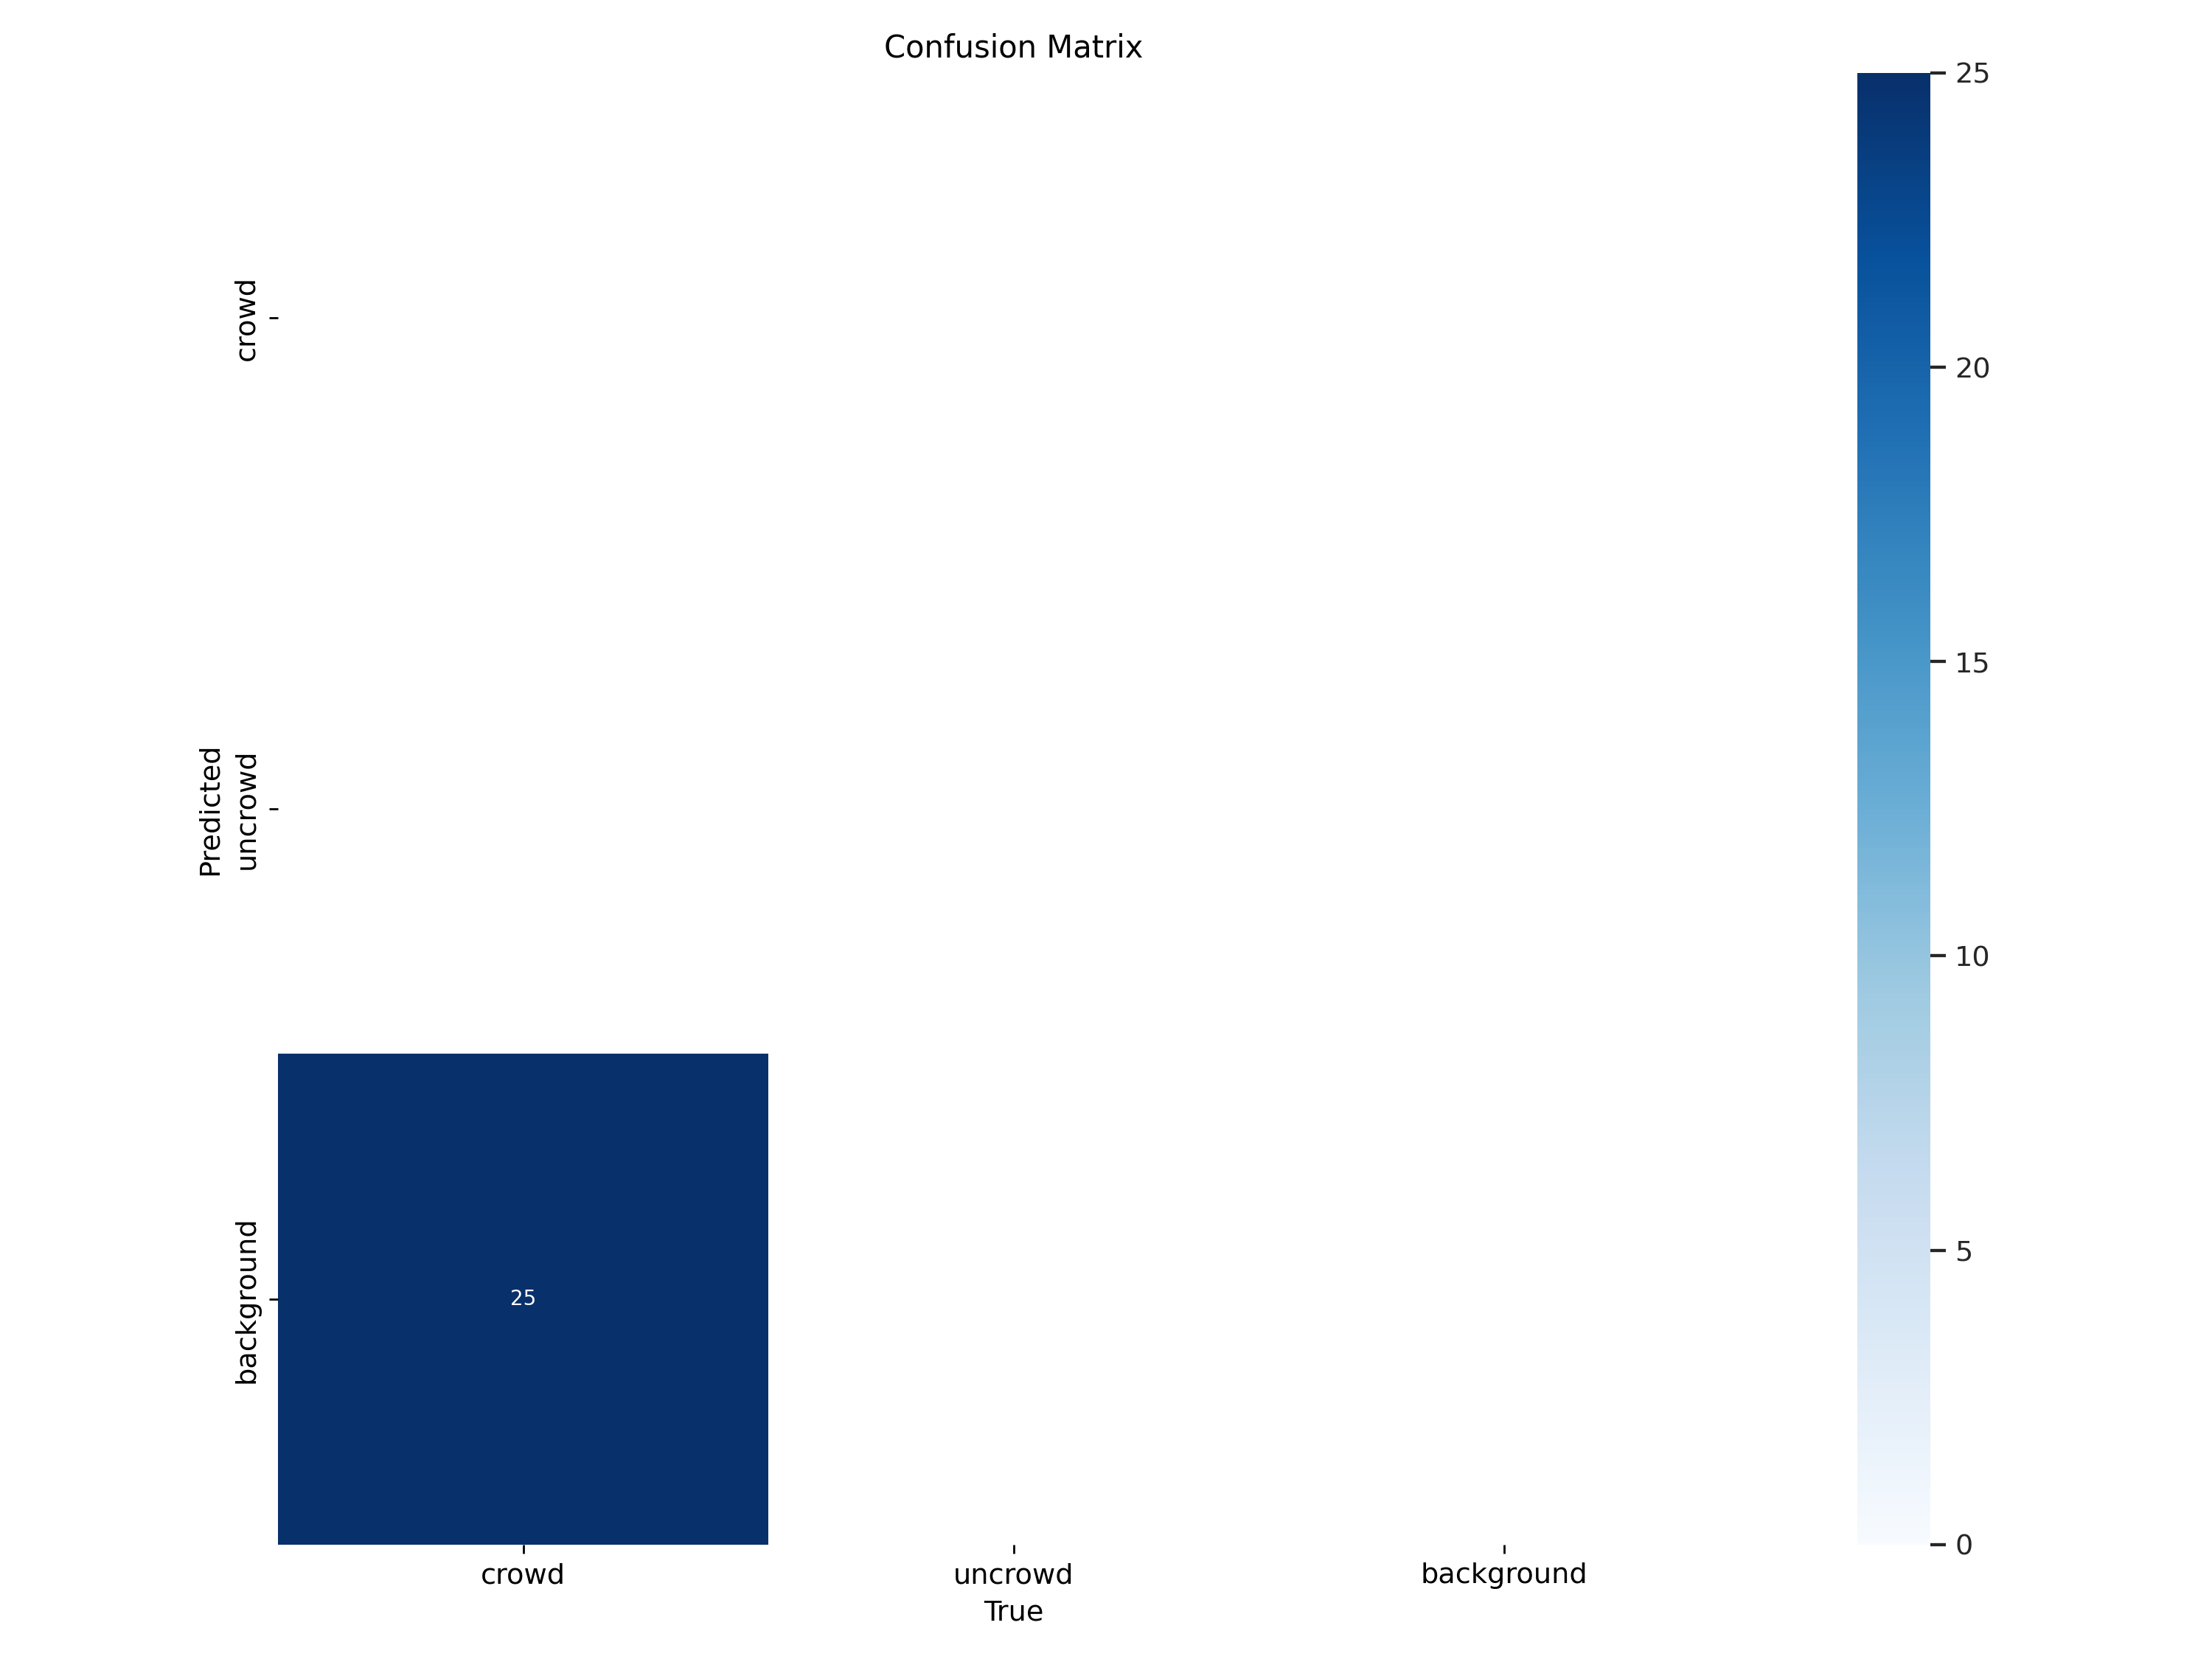

In [ ]:
Image(filename='/content/runs/detect/train5/confusion_matrix.png', width=600)

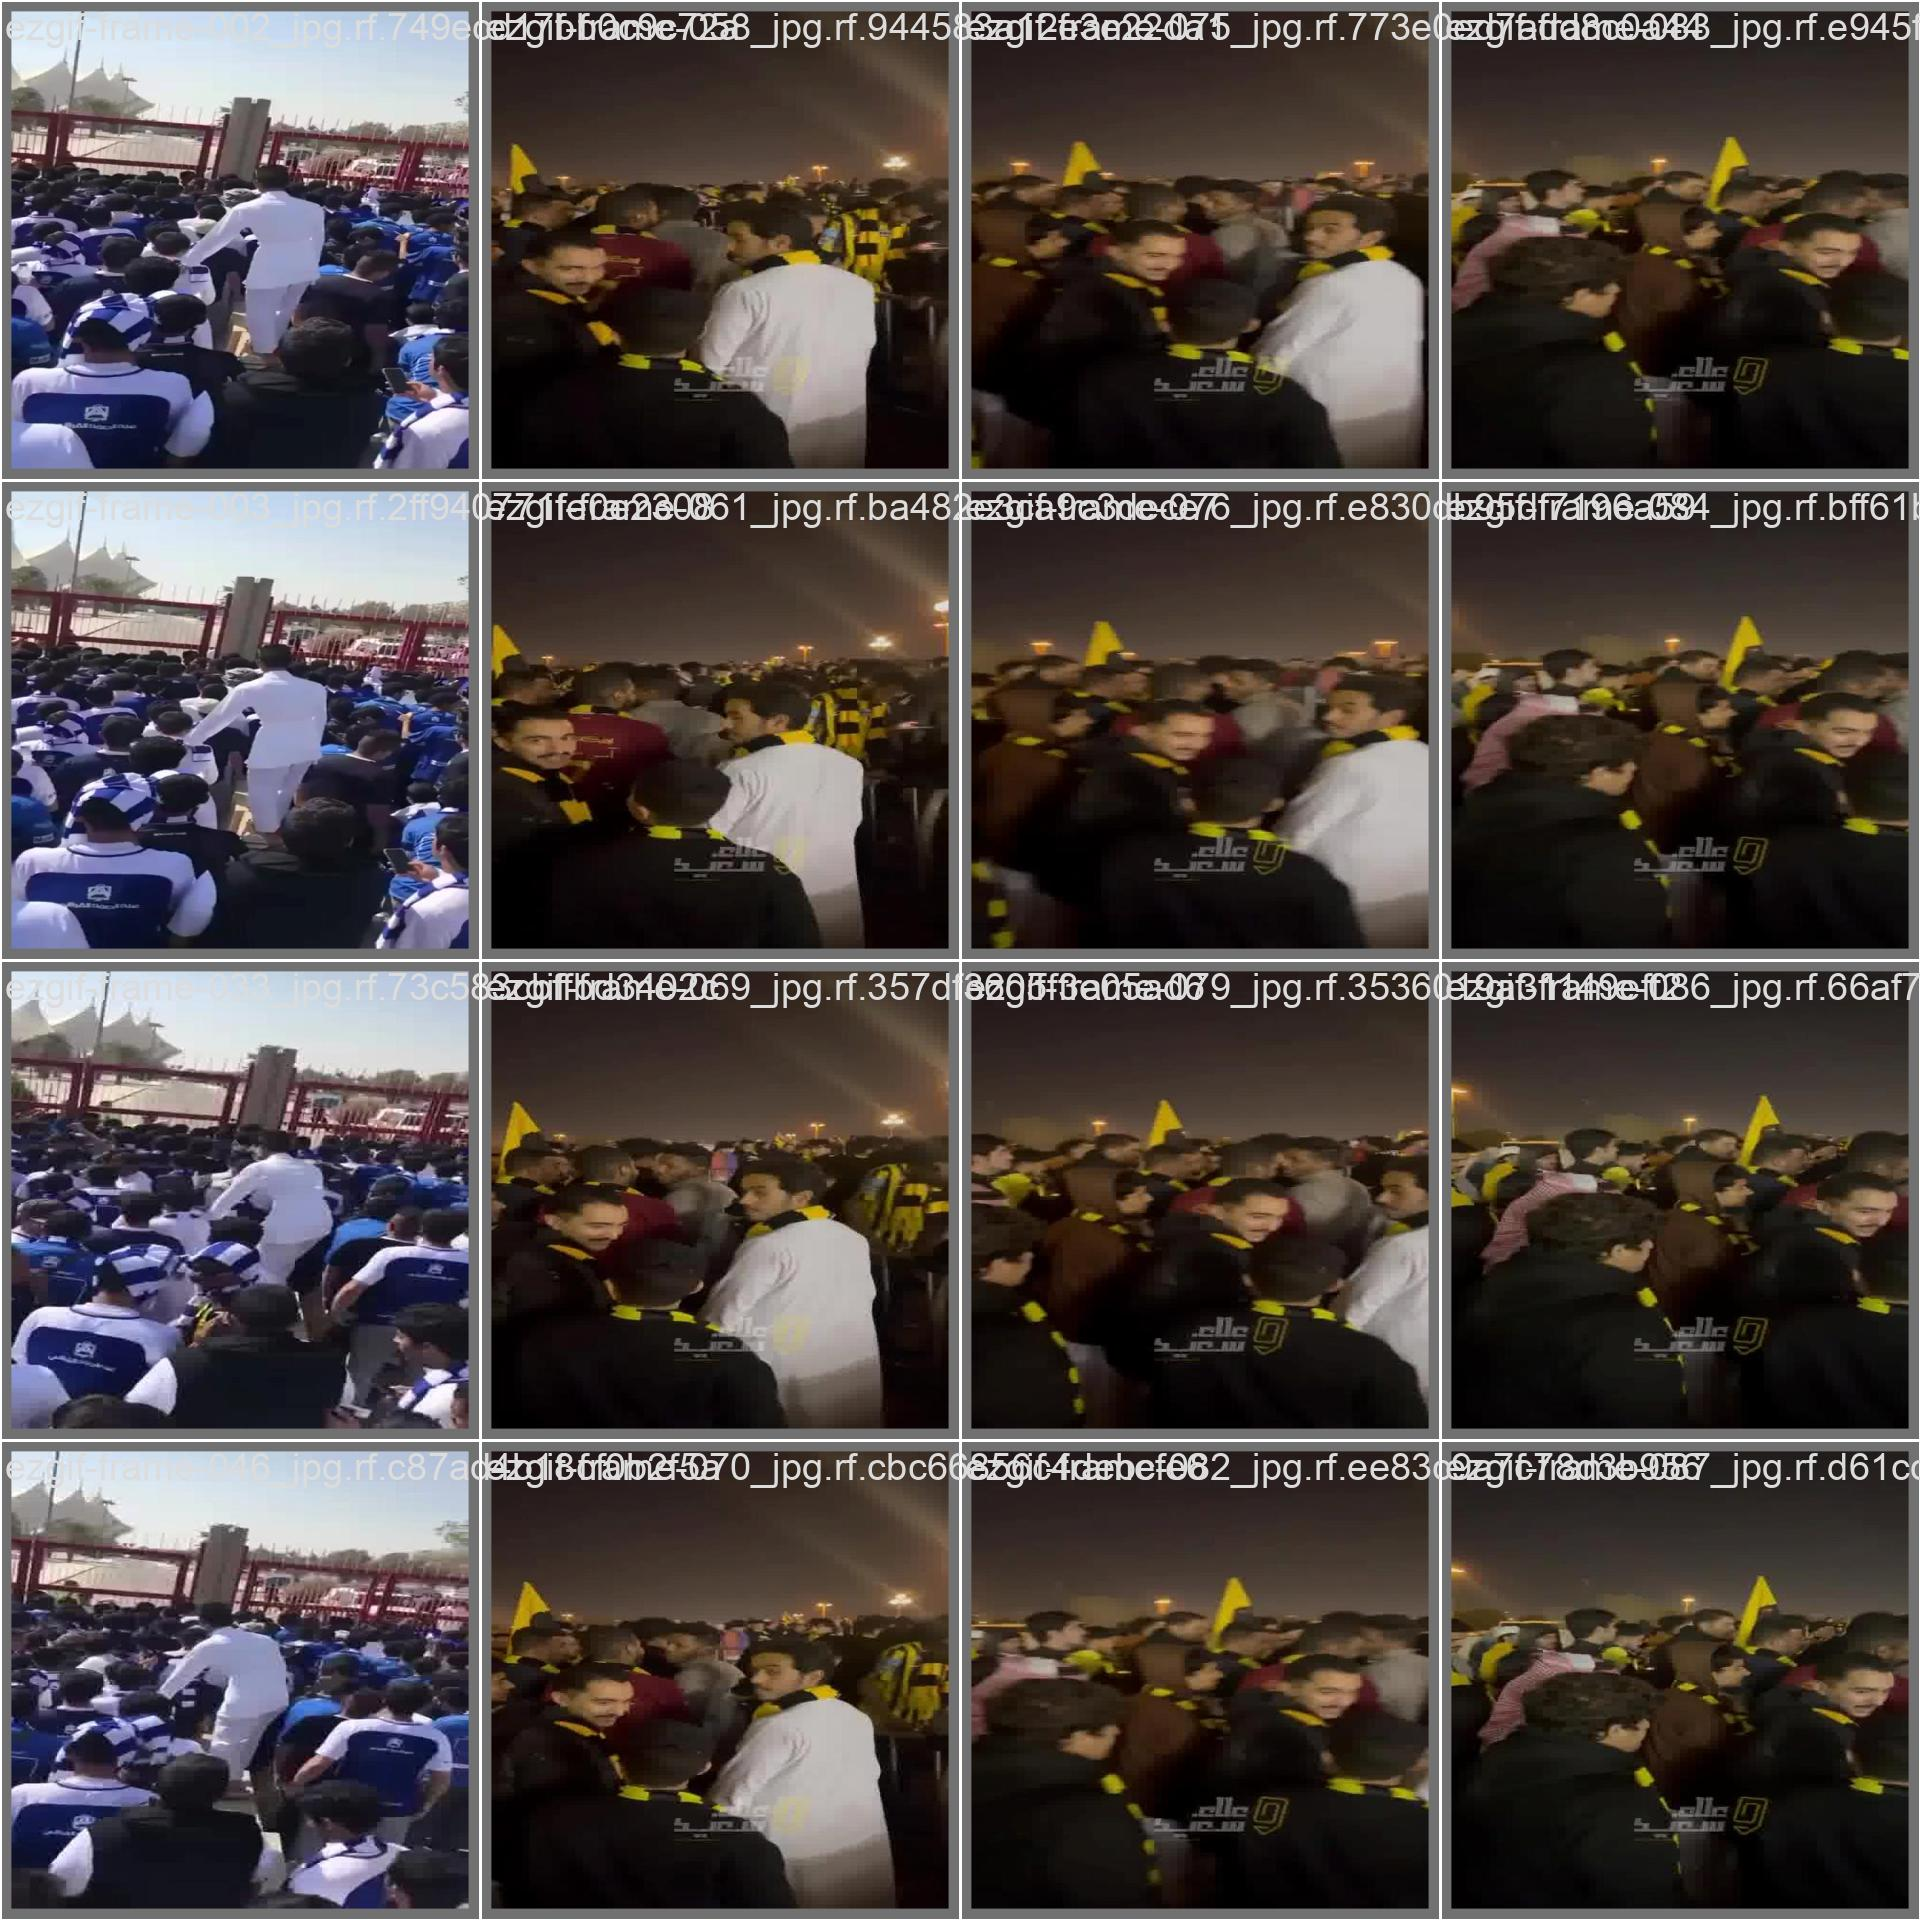

In [ ]:
Image(filename='/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9629629629629629
Test Accuracy:  0.9333333333333333
